In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
from sklearn import datasets
from sklearn.svm import  SVC
import numpy as np
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv("Cleaned/HorrorMissingCleaned.csv")
data.info()

data["Rating_class"] = np.where(data["Rating"] > 4.0, 'good', 'mid')
data.info()
# X = data[["Year"]]
# y = data["Rating_class"]

X = data.iloc[0:1001, 2:4]
y = data.loc[0:1000, 'Rating_class']


svm = SVC(kernel = 'linear', random_state=1, gamma=0.05, C = 1)

svm.fit(X,y)

y_pred = svm.predict(X)
print("Accuracy score: " + str(accuracy_score(y, y_pred)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1150 non-null   object 
 1   Author  1150 non-null   object 
 2   Year    1150 non-null   int64  
 3   Rating  1150 non-null   float64
 4   Raters  1150 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 45.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1150 non-null   object 
 1   Author        1150 non-null   object 
 2   Year          1150 non-null   int64  
 3   Rating        1150 non-null   float64
 4   Raters        1150 non-null   int64  
 5   Rating_class  1150 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.0+ KB
Accuracy score: 0.7202797202797203


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1150 non-null   object 
 1   Author        1150 non-null   object 
 2   Year          1150 non-null   int64  
 3   Rating        1150 non-null   float64
 4   Raters        1150 non-null   int64  
 5   Rating_class  1150 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.0+ KB
0


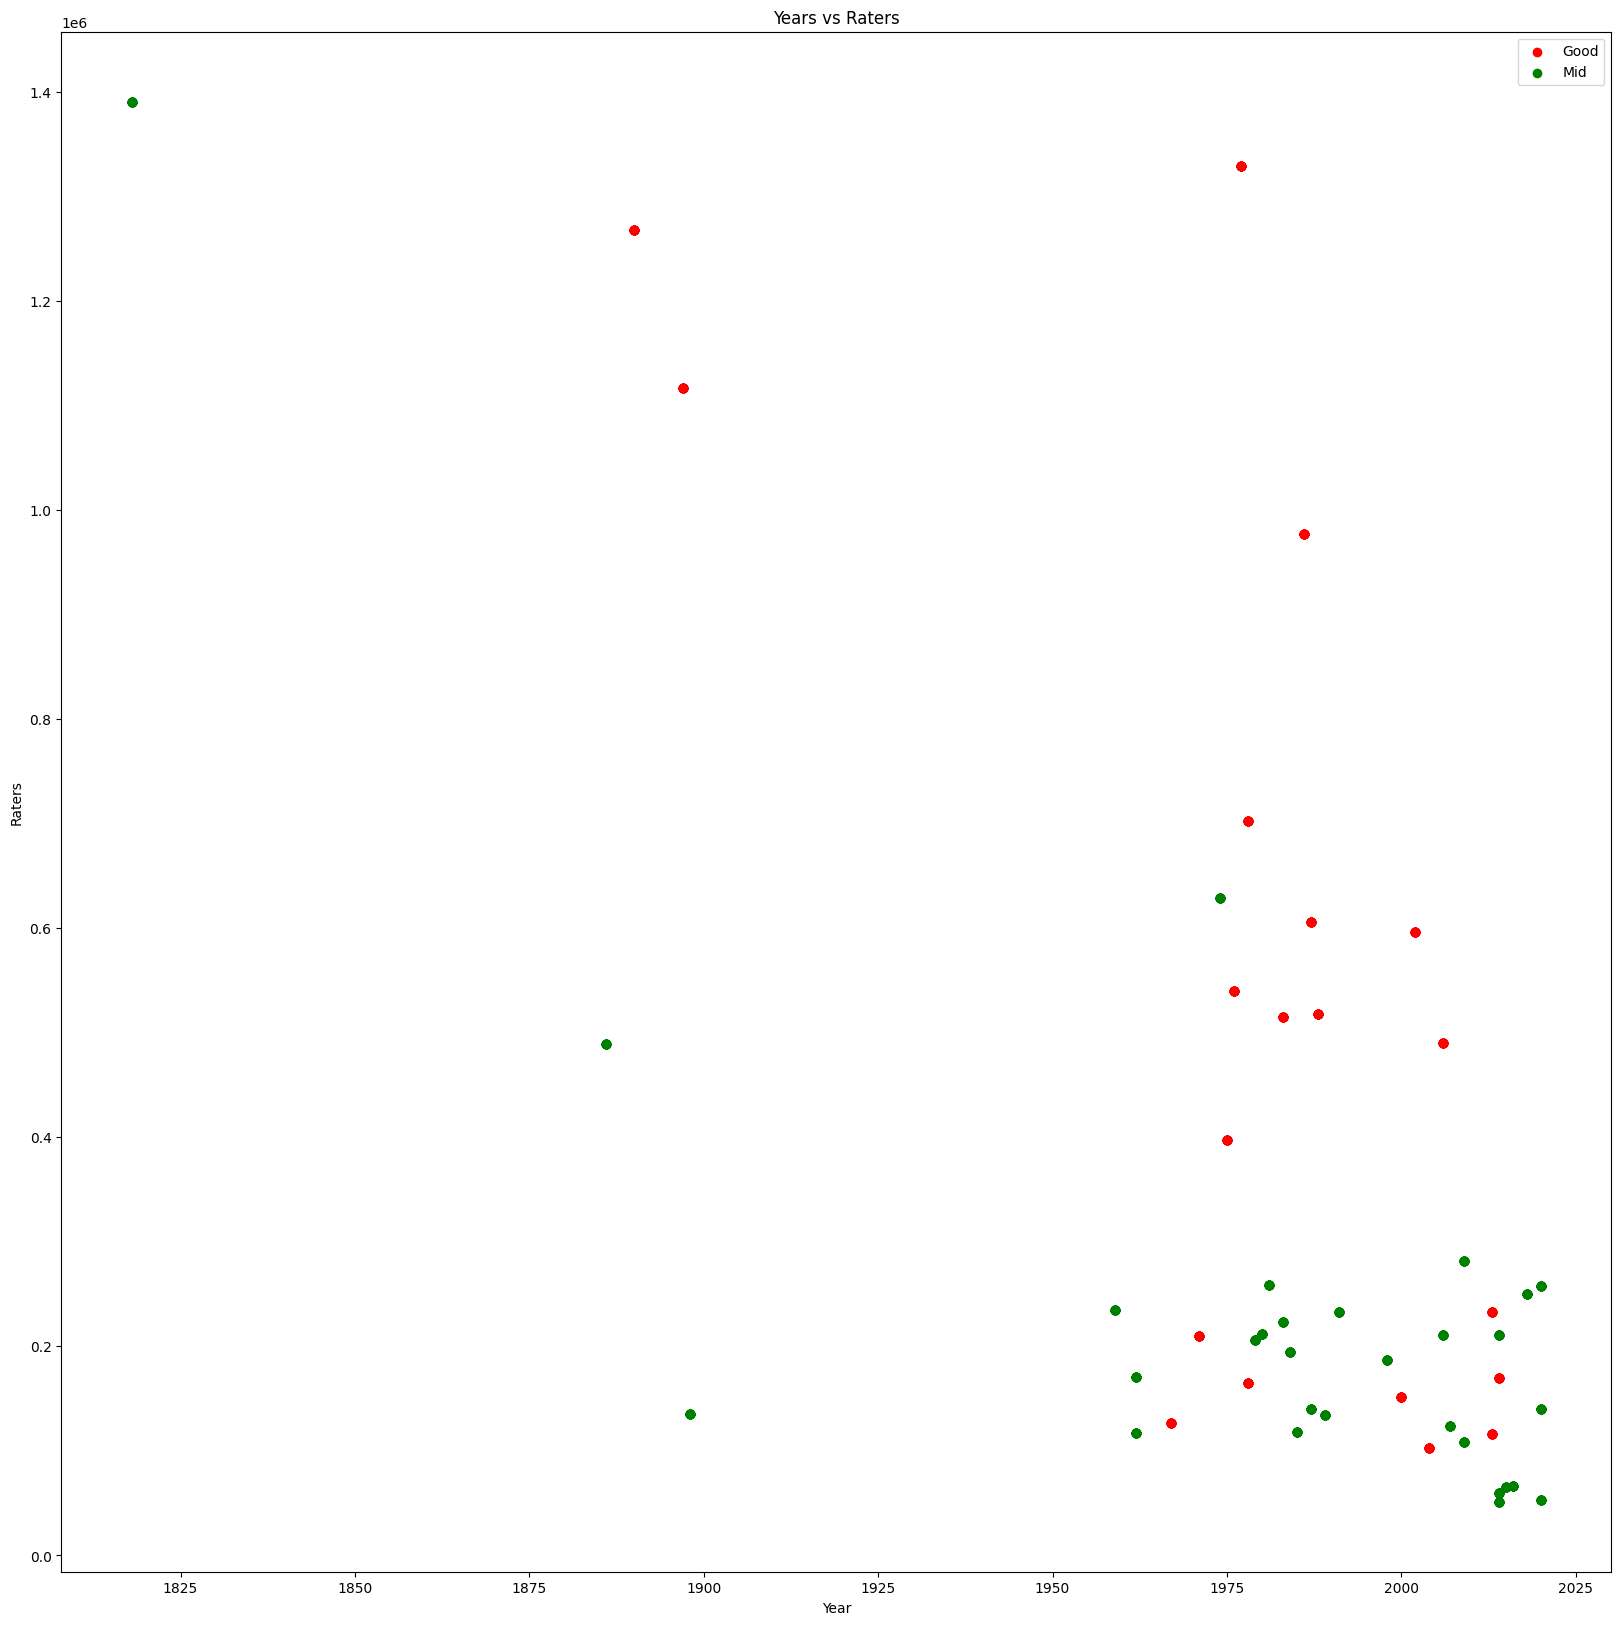

In [6]:
data.info()

# ddf.plot(kind= "scatter", x=)
fig, ax = plt.subplots(figsize=(20,20))

x = data[["Year", "Rating_class"]]
y = data[["Raters", "Rating_class"]]
z = data["Rating_class"]

ax.scatter(x[x["Rating_class"]== "good"]["Year"], y[y["Rating_class"]== "good"]["Raters"], color = "red", label = "Good")
ax.scatter(x[x["Rating_class"]== "mid"]["Year"], y[y["Rating_class"]== "mid"]["Raters"], color = "green", label = "Mid")
ax.legend()

print(len(data[data['Title'] == "Missing"]))
pd.DataFrame.dropna

ax.set_xlabel('Year')
ax.set_ylabel('Raters')
ax.set_title('Years vs Raters')

plt.show()

In [7]:
data.to_csv("HorrorSVM.csv", index = False)
